In [1]:
import numpy as np
import pandas as pd
from typing import List
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
df = pd.read_excel("./data/Gini-RF-20.xlsx", skiprows=3)

In [4]:
df.head()

,Год,Первый квинтиль (20%),Второй квинтиль (20%),Третий квинтиль (20%),Четвёртый квинтиль (20%),Пятый квинтиль (20%)
0,1993,5.8,11.1,16.7,24.8,41.6
1,1994,5.3,10.2,15.2,23.0,46.3
2,1995,5.5,10.2,15.0,22.4,46.9
3,1996,6.5,10.9,15.5,22.4,44.7
4,1997,6.2,10.6,15.1,21.4,46.7


In [12]:
def get_gini_coef(x: List[float]) -> float:
    mad = np.abs(np.subtract.outer(x, x)).mean()
    rmad = mad / np.mean(x)
    return 0.5 * rmad

In [13]:
y = [0] + [0.2 for _ in range(5)]
x_axis, y_axis = np.cumsum(y), []
gini_coef_list = []

for i in range(len(df)):
    x = df.loc[i].values[1:] / 100
    gini_coef_list.append(get_gini_coef(x))
    y_axis.append(np.cumsum(np.concatenate(([0], x))))

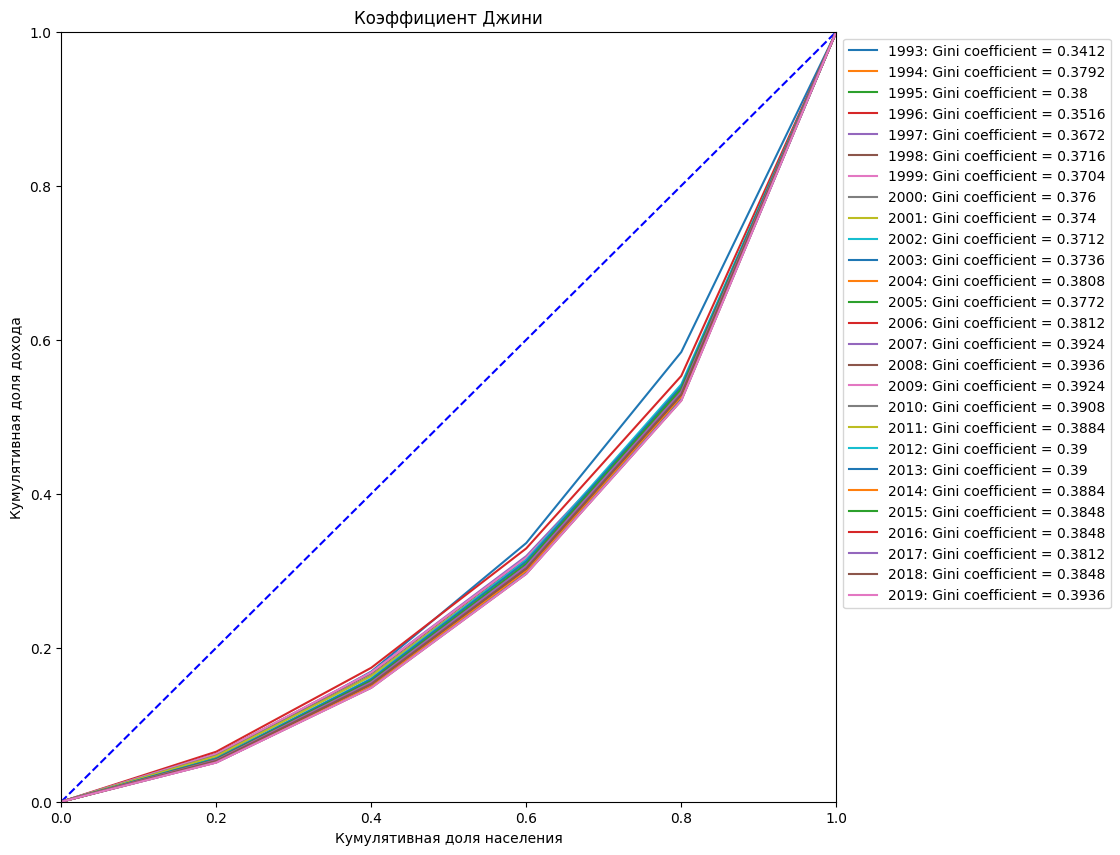

In [14]:
plt.figure(figsize=(10, 10))

plt.title("Коэффициент Джини")
plt.xlabel("Кумулятивная доля населения")
plt.ylabel("Кумулятивная доля дохода")

plt.plot([0, 1], "b--")

for i in range(len(df)):
    plt.plot(x_axis, y_axis[i], label=f"{df['Год'][i]}: Gini coefficient = {round(gini_coef_list[i], 4)}")

plt.legend(bbox_to_anchor=(1, 1))
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.show()